# EVA3D: Compositional 3D Human Generation from 2D Image Collections

Authored by Fangzhou Hong, Zhaoxi Chen, Yushi Lan, Liang Pan, Ziwei Liu

This colab notebook provides a quick demo of EVA3D with the model trained on DeepFashion.

Useful links:

1. Github Repo: https://github.com/hongfz16/EVA3D
2. Project Page: https://hongfz16.github.io/projects/EVA3D.html
3. arXiv Link: https://arxiv.org/abs/2210.04888

In [ ]:
# @title Licensed under the S-Lab License

# S-Lab License 1.0

# Copyright 2022 S-Lab

# Redistribution and use for non-commercial purpose in source and binary forms, with or without modification, are permitted provided that the following conditions are met: 
# 1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.
# 2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.
# 3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
# 4. In the event that redistribution and/or use for commercial purpose in source or binary forms, with or without modification is required, please contact the contributor(s) of the work.


In [3]:
# @title Setup Everything

!nvidia-smi
!git clone https://github.com/hongfz16/EVA3D.git
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

import sys
import torch
pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
version_str="".join([
    f"py3{sys.version_info.minor}_cu",
    torch.version.cuda.replace(".",""),
    f"_pyt{pyt_version_str}"
])
!pip install fvcore iopath
!pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
!pip install -r EVA3D/requirements.txt

Fri Feb 10 11:16:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# @title Download Models
%cd EVA3D
from download_models import download_pretrained_models
download_pretrained_models()

/content/EVA3D


  0%|          | 0.00/160M [00:00<?, ?B/s]            

[Errno Incorrect file size] checkpoint/512x256_deepfashion/volume_renderer/models_0420000.pt


100%|██████████| 160M/160M [00:02<00:00, 56.7MB/s]


100%|██████████| 39.0M/39.0M [00:03<00:00, 9.95MB/s]


/usr/local/lib/python3.8/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
  0% 0/1 [00:00<?, ?it/s]Marching Cube: 0/5
Marching Cube: 1/5
Marching Cube: 2/5
Marching Cube: 3/5
Marching Cube: 4/5
/usr/local/lib/python3.8/dist-packages/pytorch3d/io/obj_io.py:542: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")
/usr/local/lib/python3.8/dist-packages/torchvision/utils.py:63: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  warnings.warn(
100% 1/1 [00:26<00:00, 26.81s/it]


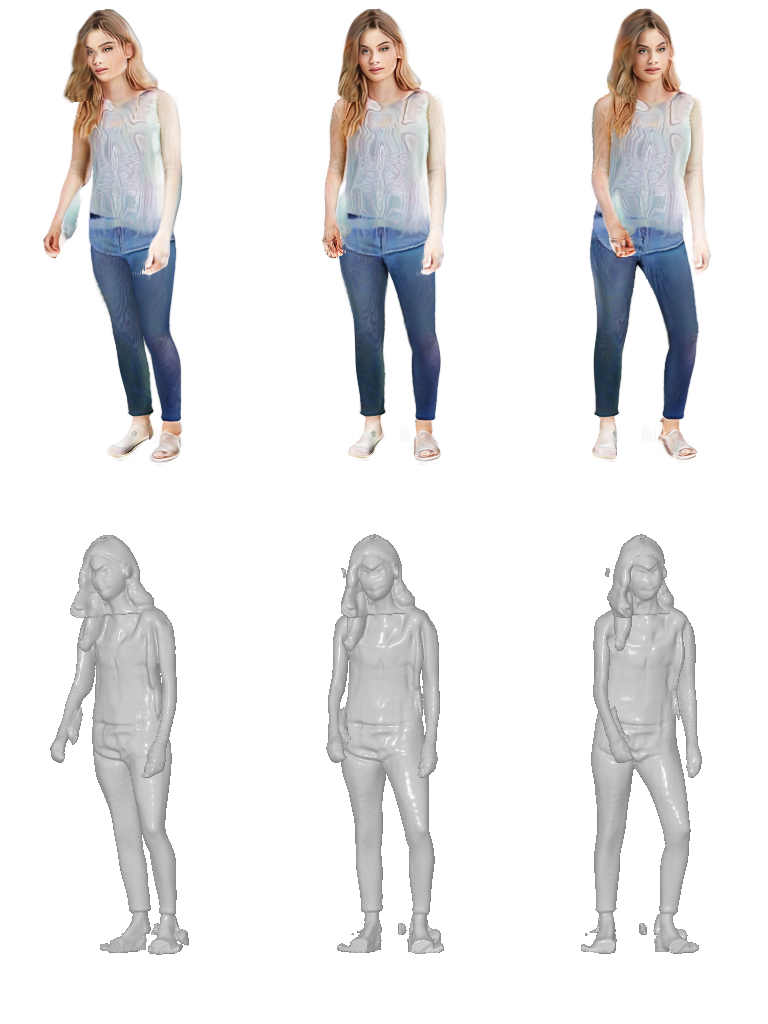

In [5]:
# @title Start the Genenration!
!python generation_demo.py --batch 1 --chunk 1 --expname 512x256_deepfashion --dataset_path demodataset --depth 5 --width 128 --style_dim 128 --renderer_spatial_output_dim 512 256 --no_sphere_init --input_ch_views 3 --white_bg --voxhuman_name eva3d_deepfashion --deltasdf --N_samples 28 --ckpt 420000 --identities 1 --truncation_ratio 0.5
from IPython.display import Image
Image('evaluations/512x256_deepfashion/iter_0420000/random_angles/images_paper_fig/0000000.png')